<a href="https://colab.research.google.com/github/a-delicate-balance/brain-tumor-analysis/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Input
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [ ]:
import kagglehub

# Download latest version
ROOT_PATH = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", ROOT_PATH)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [ ]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load Training Images
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Load Testing Images
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [ ]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

if isinstance(Y_train[0], str):
    Y_train_new = []
    for i in Y_train:
        Y_train_new.append(labels.index(i))
    Y_train = Y_train_new

if isinstance(Y_test[0], str):
    Y_test_new = []
    for i in Y_test:
        Y_test_new.append(labels.index(i))
    Y_test = Y_test_new

import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
model = Sequential()
model.add(Input((150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy', 'precision', 'f1_score', 'recall', 'AUC'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 200ms/step - AUC: 0.5748 - accuracy: 0.3094 - f1_score: 0.2474 - loss: 4.1237 - precision: 0.4585 - recall: 0.0591 - val_AUC: 0.8734 - val_accuracy: 0.6313 - val_f1_score: 0.6174 - val_loss: 0.8783 - val_precision: 0.7465 - val_recall: 0.2563
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - AUC: 0.8844 - accuracy: 0.6719 - f1_score: 0.6504 - loss: 0.8167 - precision: 0.7308 - recall: 0.5346 - val_AUC: 0.8746 - val_accuracy: 0.6234 - val_f1_score: 0.5564 - val_loss: 0.8546 - val_precision: 0.6840 - val_recall: 0.5617
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - AUC: 0.9432 - accuracy: 0.7688 - f1_score: 0.7547 - loss: 0.5662 - precision: 0.8006 - recall: 0.7265 - val_AUC: 0.9553 - val_accuracy: 0.7896 - val_f1_score: 0.7745 - val_loss: 0.4972 - val_precision: 0.8119 - val_recall: 0.7579
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - AUC: 0.9565 - accuracy: 0.7999 - f1_score: 0.7874 - loss: 0.4907 - precision: 0.8243 

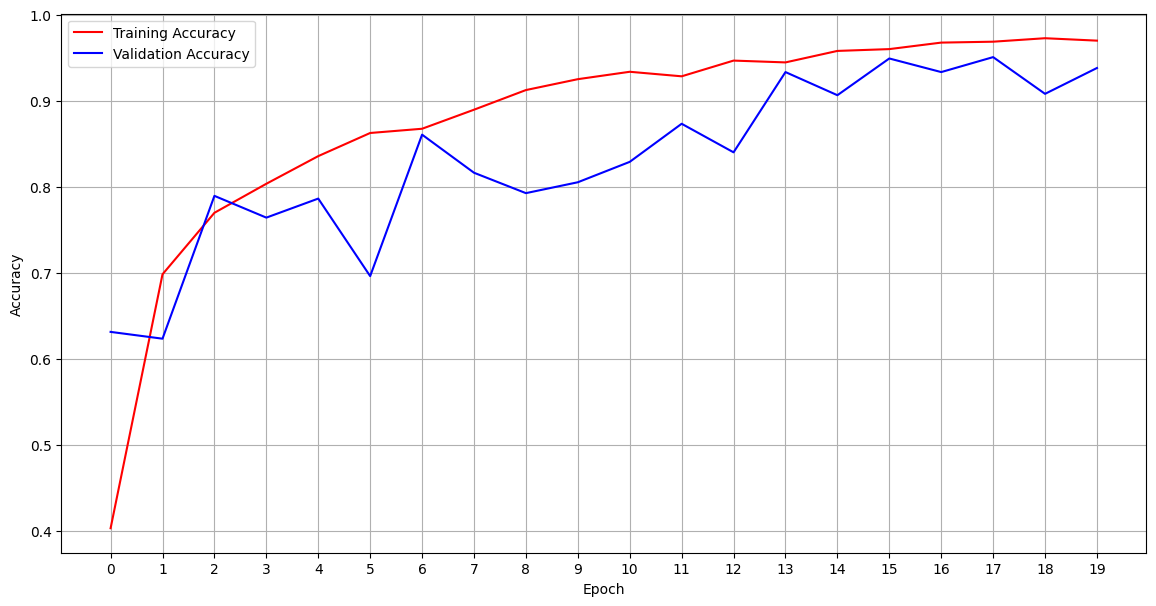

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks([x for x in epochs])
plt.show()

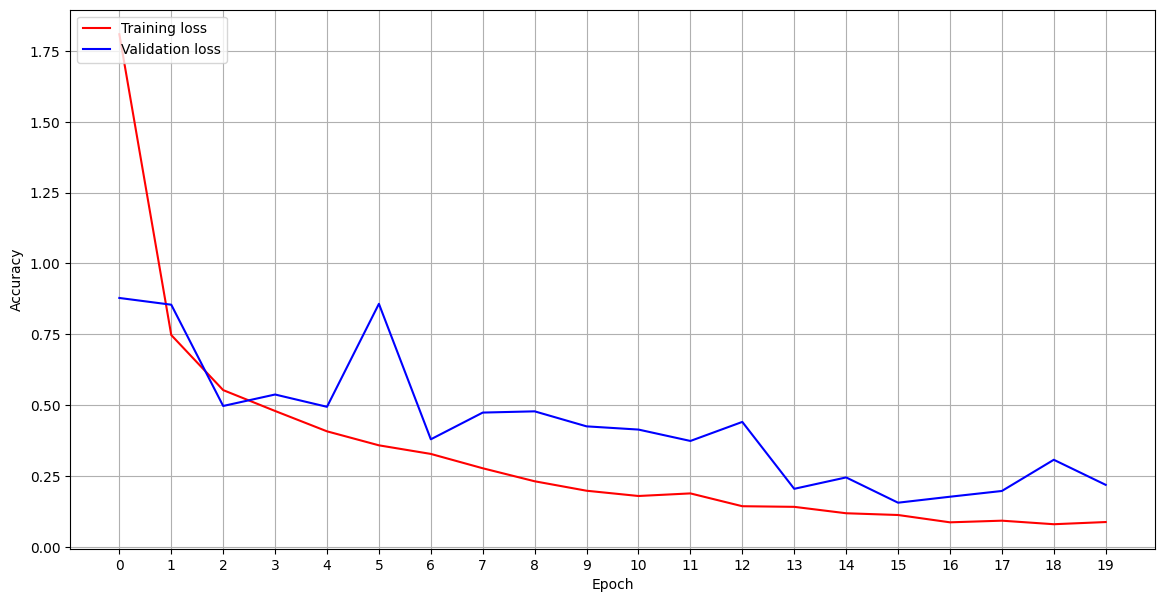

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks([x for x in epochs])
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
print(f"Accuracy: {accuracy_score(y_true, y_pred_classes) * 100:.2f}%")
print(f"Precision: { precision_score(y_true=y_true, y_pred=y_pred_classes, average='weighted') * 100:.2f}%")
print(f"Recall: {recall_score(y_true, y_pred_classes, average='weighted') * 100:.2f}%")
print(f"F1: {f1_score(y_true, y_pred_classes, average='weighted') * 100:.2f}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       162
           1       0.93      0.84      0.88       164
           2       0.98      0.99      0.99       199
           3       0.98      0.98      0.98       178

    accuracy                           0.94       703
   macro avg       0.94      0.94      0.94       703
weighted avg       0.95      0.94      0.94       703

Accuracy: 94.45%
Precision: 94.54%
Recall: 94.45%
F1: 94.39%


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


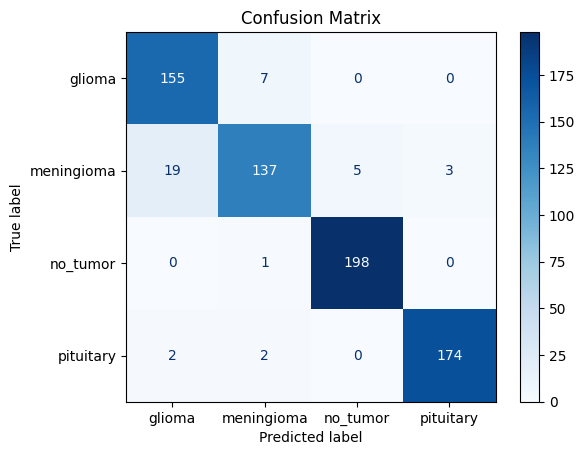

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_and_display(img_path):
  img = cv2.imread(img_path)
  img_resized = cv2.resize(img, (150, 150))
  img_array = np.array(img_resized)
  img_array = img_array.reshape(1, 150, 150, 3)

  result = model.predict(img_array)
  indices = result.argmax()
  confidence_score = np.max(result, axis=1)[0]

  plt.imshow(img_resized)
  plt.axis('off')
  plt.title(f"{img_path}\nDiagnosis: {labels[indices]} Confidence: {confidence_score * 100:.2f}%")
  plt.show()

/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0064.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


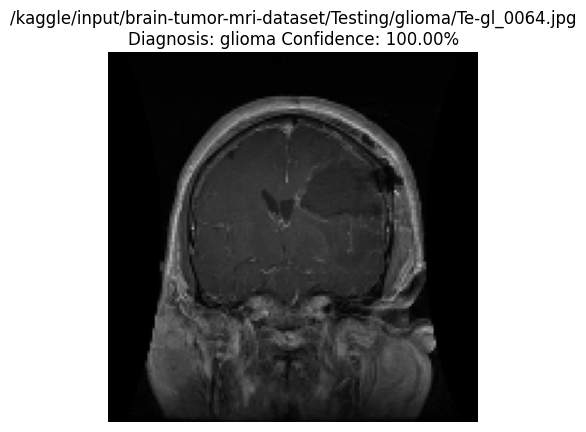

In [ ]:
import random
import glob

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
selected_label = random.choice(labels)

files = glob.glob(f"/kaggle/input/brain-tumor-mri-dataset/Testing/{selected_label}/*")
img_path = random.choice(files)
print(img_path)

#img_path = '/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0015.jpg'
predict_and_display(img_path)